In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit_aer.primitives import Sampler as AerSampler
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import RYGate
from qiskit_experiments.library import StateTomography
import numpy as np

sim_backend = Aer.get_backend('aer_simulator')

In [2]:
def show_statevector(qc):
    """Display statevector of a circuit."""
    qc_clean = qc.remove_final_measurements(inplace=False) if qc.num_clbits > 0 else qc
    sv = Statevector.from_instruction(qc_clean)
    display(sv)
    return sv

def simulate_circuit(qc, shots=8192):
    """Add measurements, run simulation, return counts and histogram."""
    n = qc.num_qubits
    qc_meas = QuantumCircuit(n, n)
    qc_meas.compose(qc, inplace=True)
    qc_meas.measure(range(n), range(n))
    tqc = transpile(qc_meas, sim_backend)
    result = sim_backend.run(tqc, shots=shots).result()
    counts = result.get_counts()
    display(plot_histogram(counts))
    return counts

## Q1(a): Fredkin Gate Self-Inverse

|000> -> identity: True
|001> -> identity: True
|010> -> identity: True
|011> -> identity: True
|100> -> identity: True
|101> -> identity: True
|110> -> identity: True
|111> -> identity: True


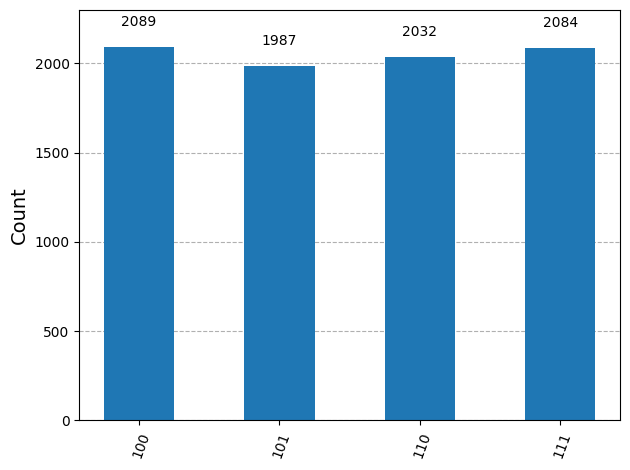

In [3]:
qc_fredkin = QuantumCircuit(3, name="Fredkin")
qc_fredkin.cswap(0, 1, 2)
fredkin_gate = qc_fredkin.to_gate(label="CSWAP")

# Test on all basis states
for i in range(8):
    init_sv = Statevector.from_int(i, 8)
    qc_test = QuantumCircuit(3)
    qc_test.append(fredkin_gate, [0, 1, 2])
    qc_test.append(fredkin_gate, [0, 1, 2])
    final_sv = init_sv.evolve(qc_test)
    print(f"|{i:03b}> -> identity: {np.allclose(init_sv.data, final_sv.data)}")

# Test on superposition
qc_super = QuantumCircuit(3, 3)
qc_super.h([0, 1])
qc_super.x(2)
qc_super.append(fredkin_gate, [0, 1, 2])
qc_super.append(fredkin_gate, [0, 1, 2])
qc_super.measure([0, 1, 2], [0, 1, 2])

tqc = transpile(qc_super, sim_backend)
result = sim_backend.run(tqc, shots=8192).result()
display(plot_histogram(result.get_counts()))

## Q1(b-e): CNOT Identities

In [4]:
def compare_circuits(qc1, qc2, label):
    """Compare two 2-qubit circuits on all basis states, up to global phase."""
    print(label)
    for basis in range(4):
        sv_in = Statevector.from_int(basis, 4)
        sv1 = sv_in.evolve(qc1)
        sv2 = sv_in.evolve(qc2)
        nonzero = sv2.data != 0
        if np.any(nonzero):
            phase = sv1.data[nonzero][0] / sv2.data[nonzero][0]
            sv2_corrected = sv2.data * phase
        else:
            sv2_corrected = sv2.data
        print(f"  |{basis:02b}> equal: {np.allclose(sv1.data, sv2_corrected)}")

# Define test cases: (LHS ops, RHS ops, label)
test_cases = [
    (lambda qc: qc.x(0), lambda qc: [qc.x(0), qc.x(1)], "C X1 C = X1 X2"),
    (lambda qc: qc.z(0), lambda qc: qc.z(0), "C Z1 C = Z1"),
    (lambda qc: qc.y(1), lambda qc: [qc.z(0), qc.y(1)], "C Y2 C = Z1 Y2"),
    (lambda qc: qc.y(0), lambda qc: [qc.y(0), qc.x(1)], "C Y1 C = Y1 X2"),
]

for lhs_op, rhs_op, label in test_cases:
    qc_lhs = QuantumCircuit(2)
    qc_lhs.cx(0, 1)
    lhs_op(qc_lhs)
    qc_lhs.cx(0, 1)
    
    qc_rhs = QuantumCircuit(2)
    rhs_op(qc_rhs)
    
    compare_circuits(qc_lhs, qc_rhs, label)

C X1 C = X1 X2
  |00> equal: True
  |01> equal: True
  |10> equal: True
  |11> equal: True
C Z1 C = Z1
  |00> equal: True
  |01> equal: True
  |10> equal: True
  |11> equal: True
C Y2 C = Z1 Y2
  |00> equal: True
  |01> equal: True
  |10> equal: True
  |11> equal: True
C Y1 C = Y1 X2
  |00> equal: True
  |01> equal: True
  |10> equal: True
  |11> equal: True


## Q2: GHZ States (3, 4, 5 qubits)

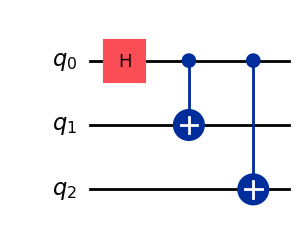

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


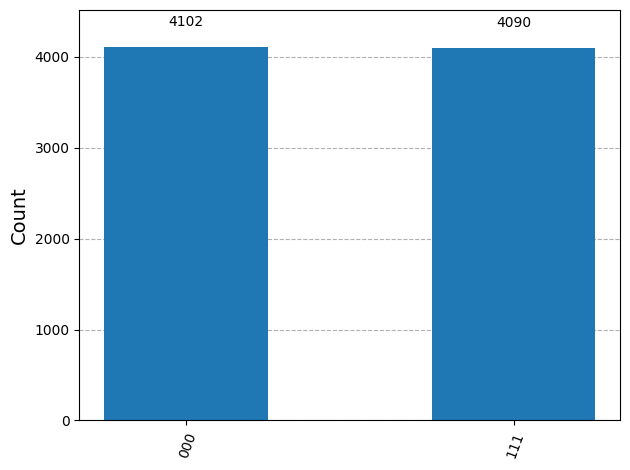

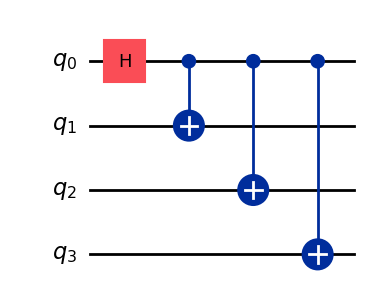

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2, 2, 2))


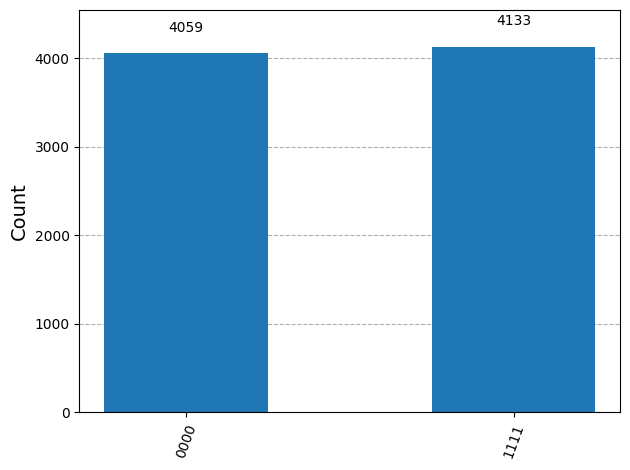

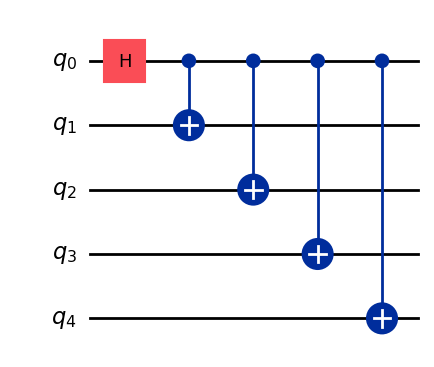

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2, 2, 2))


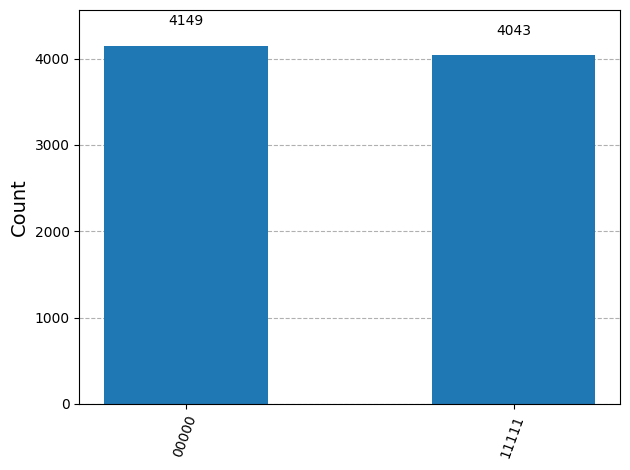

In [5]:
def ghz_circuit(n):
    """N-qubit GHZ state circuit."""
    qc = QuantumCircuit(n, name=f"GHZ_{n}")
    qc.h(0)
    for i in range(1, n):
        qc.cx(0, i)
    return qc

for n in [3, 4, 5]:
    qc = ghz_circuit(n)
    display(qc.draw('mpl'))
    show_statevector(qc)
    simulate_circuit(qc)

## Q3: Custom Entangled States

psi1:


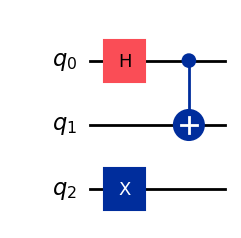

Statevector([0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))
psi2:


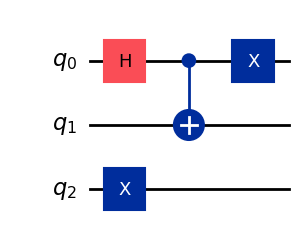

Statevector([0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.70710678+0.j, 0.        +0.j],
            dims=(2, 2, 2))
psi3:


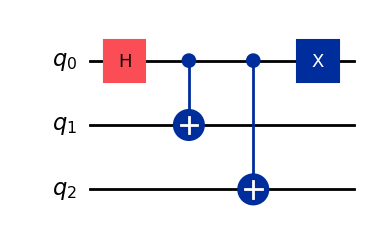

Statevector([0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j, 0.        +0.j],
            dims=(2, 2, 2))


In [6]:
def state_psi1():
    """(|001> + |110>)/sqrt(2)"""
    qc = QuantumCircuit(3, name="psi1")
    qc.h(0)
    qc.cx(0, 1)
    qc.x(2)
    return qc

def state_psi2():
    """(|101> + |010>)/sqrt(2)"""
    qc = QuantumCircuit(3, name="psi2")
    qc.h(0)
    qc.cx(0, 1)
    qc.x([0, 2])
    return qc

def state_psi3():
    """(|100> + |011>)/sqrt(2)"""
    qc = QuantumCircuit(3, name="psi3")
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(0, 2)
    qc.x(0)
    return qc

for i, state_fn in enumerate([state_psi1, state_psi2, state_psi3], 1):
    qc = state_fn()
    print(f"psi{i}:")
    display(qc.draw('mpl'))
    show_statevector(qc)

## Q4: W States (3 and 4 qubits) with Tomography

W3 Statevector:
Statevector([0.        +0.j, 0.57735027+0.j, 0.57735027+0.j,
             0.        +0.j, 0.57735027+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))
W4 Statevector:
Statevector([ 3.11164266e-19+0.00000000e+00j,
              5.00000000e-01+0.00000000e+00j,
              5.00000000e-01+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              5.00000000e-01+0.00000000e+00j,
             -1.08174986e-17+2.72367625e-34j,
              8.70473125e-18-8.17102874e-34j,
              0.00000000e+00+0.00000000e+00j,
              5.00000000e-01+0.00000000e+00j,
              3.11164266e-19+0.00000000e+00j,
              3.11164266e-19+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              3.11164266e-19+0.00000000e+00j,
              2.86451577e-34-2.72367625e-34j,
             -6.91263708e-34+2.72367625e-34j,
              0.00000000e+00+0.00000000e+00j],
            dims=(2, 2, 2, 2))


/var/folders/tt/f0lw_k_d15v3w5wjjv20m2c00000gn/T/ipykernel_85857/3399011468.py:32: DeprecationWarning: Leaving `dataframe` unset or setting it to `False` for `ExperimentData.analysis_results` is deprecated as of qiskit-experiments 0.9.0. Future releases may change the default to `True` and remove the option to set the value to `False`.
  density_mat = exp_data.analysis_results("state").value


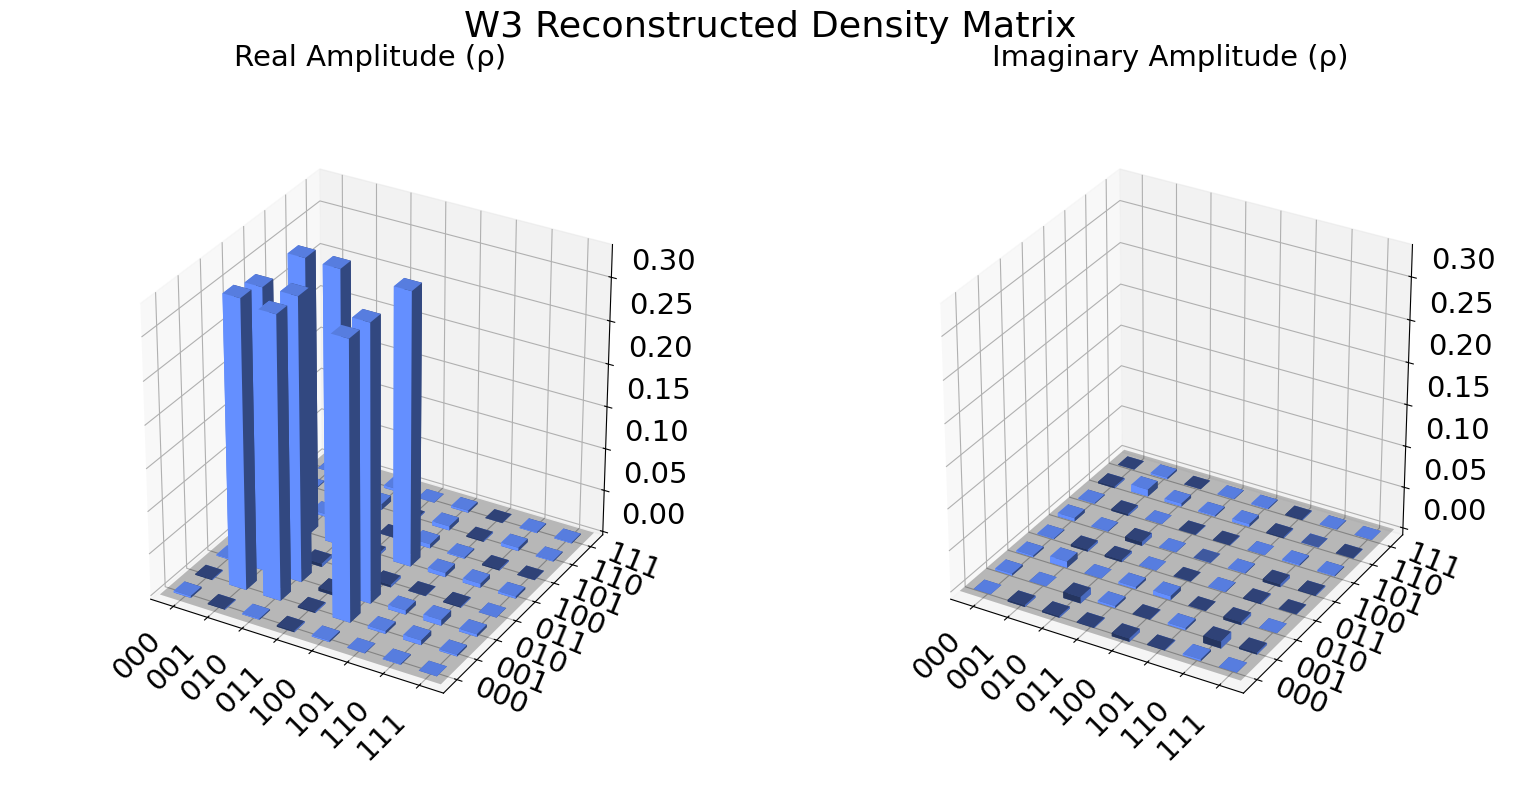

In [7]:
def w3_circuit():
    """(|001> + |010> + |100>)/sqrt(3)"""
    qc = QuantumCircuit(3)
    qc.ry(2 * np.arccos(np.sqrt(2/3)), 0)
    qc.cry(2 * np.arccos(np.sqrt(1/2)), 0, 1, ctrl_state='0')
    qc.x([0, 1])
    qc.mcx([0, 1], 2)
    qc.x([0, 1])
    return qc

def w4_circuit():
    """(|0001> + |0010> + |0100> + |1000>)/2"""
    qc = QuantumCircuit(4)
    qc.ry(2 * np.arccos(np.sqrt(3/4)), 0)
    qc.cry(2 * np.arccos(np.sqrt(2/3)), 0, 1, ctrl_state='0')
    ry_gate = RYGate(2 * np.arccos(np.sqrt(1/2))).control(2, ctrl_state='00')
    qc.append(ry_gate, [0, 1, 2])
    qc.x([0, 1, 2])
    qc.mcx([0, 1, 2], 3)
    qc.x([0, 1, 2])
    return qc

print("W3 Statevector:")
show_statevector(w3_circuit())

print("W4 Statevector:")
show_statevector(w4_circuit())

# State tomography for W3
exp = StateTomography(w3_circuit())
exp_data = exp.run(AerSimulator()).block_for_results()
density_mat = exp_data.analysis_results("state").value
display(plot_state_city(density_mat, title="W3 Reconstructed Density Matrix"))

## Q5: General N-qubit GHZ and W States

In [8]:
def ghz_general(n):
    """General N-qubit GHZ state."""
    qc = QuantumCircuit(n, name=f"GHZ_{n}")
    if n > 0:
        qc.h(0)
        for i in range(n - 1):
            qc.cx(i, i + 1)
    return qc

def w_general(n):
    """General N-qubit W state."""
    qc = QuantumCircuit(n, name=f"W_{n}")
    if n == 0:
        return qc
    if n == 1:
        qc.x(0)
        return qc
    
    qc.ry(2 * np.arccos(np.sqrt((n - 1) / n)), 0)
    
    for i in range(1, n - 1):
        remaining = n - i
        theta = 2 * np.arccos(np.sqrt((remaining - 1) / remaining))
        ctrl_states = '0' * i
        gate = RYGate(theta).control(i, ctrl_state=ctrl_states)
        qc.append(gate, list(range(i)) + [i])
    
    qc.x(list(range(n - 1)))
    qc.mcx(list(range(n - 1)), n - 1)
    qc.x(list(range(n - 1)))
    return qc

print("GHZ_6:")
show_statevector(ghz_general(6))

print("W_3:")
show_statevector(w_general(3))

GHZ_6:
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.  